# US Presidential Election Descriptive Analytics - Modeling

This project builds on the results of the data cleaning and EDA to carry out 
a descriptive analytics on US presidential election data. First, correlation 
of various demographic factors with party vote shares are evaluated. Then, 
the difference between vote shares across 2012 and 2016 election cycles are
statistically tested. Finally, a linear model describing the most important
factors affecting election results is built and its prediction accuracy is 
evaluated. 

# Correlation of Demographic Factors with Election Results

This section describes the methods used to analyze correlation of demographic
factors with election results. First, clmeaned demographic and vote share data
are imported and inspected as follows:

In [59]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
data_df = pd.read_csv('data_clean.csv')
data_df.head()

,Unnamed: 0,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,47.7,0.429,0.181,0.323,0.126,747.3,0.197,0.108,449.02,82.0
1,1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,49.0,0.179,0.304,0.328,0.135,247.2,0.239,0.053,245.83,96.8
2,2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,54.1,0.381,0.210,0.298,0.118,324.1,0.239,0.096,205.60,71.6
3,3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,41.3,0.204,0.095,0.132,0.036,190.9,0.230,0.081,123.88,42.9
4,4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,64.0,0.453,0.189,0.358,0.153,497.9,0.208,0.115,477.48,79.4


The first six columns are not demographic information and therefore useless for the purpose of the analysis in this project. 
Therefore, a new dataframe is created including only demographic information to simplify the scripts in the analysis.

In [61]:
demo_df = data_df.drop(['Unnamed: 0', 'State', 'Fips', 'County'], axis = 'columns')
demo_df

,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths
0,17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,67.90,27.95,...,47.7,0.429,0.181,0.323,0.126,747.30,0.197,0.108,449.02,82.0
1,20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,92.00,0.25,...,49.0,0.179,0.304,0.328,0.135,247.20,0.239,0.053,245.83,96.8
2,3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,72.70,22.20,...,54.1,0.381,0.210,0.298,0.118,324.10,0.239,0.096,205.60,71.6
3,30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,68.40,0.30,...,41.3,0.204,0.095,0.132,0.036,190.90,0.230,0.081,123.88,42.9
4,16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,66.15,29.80,...,64.0,0.453,0.189,0.358,0.153,497.90,0.208,0.115,477.48,79.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,85.65,6.85,...,35.8,0.303,0.227,0.298,0.104,302.20,0.129,0.071,339.05,55.0
3137,38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,94.70,1.45,...,44.0,0.353,0.218,0.297,0.127,238.60,0.136,0.067,133.96,72.6
3138,188.0,136654.0,11.5,88.5,20.6,7.6,78.85,28555.704445,80.80,7.95,...,34.8,0.357,0.214,0.314,0.116,387.60,0.131,0.077,266.27,46.3
3139,24.0,16487.0,16.1,83.9,23.8,8.8,73.45,19592.309205,51.95,1.55,...,49.7,0.377,0.263,0.352,0.116,365.80,0.277,0.053,184.60,91.4


The results in the buttom of the table shows that there are 40 demographic factors available in this dataset for 3141 counties in US.

In [ ]:
demo_df

In [62]:
vote_df = pd.read_csv('votes_clean.csv')
vote_df.head()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Democrats12_VoteShare,Republicans12_VoteShare,Democrats16_VoteShare,Republicans16_VoteShare
0,0,2630.0,3887.0,2364.0,3967.0,40.36,59.64,37.34,62.66
1,1,2099.0,4263.0,1587.0,4917.0,32.99,67.01,24.40,75.60
2,2,1845.0,4136.0,1544.0,4353.0,30.85,69.15,26.18,73.82
3,3,12792.0,9411.0,12652.0,8153.0,57.61,42.39,60.81,39.19
4,4,2442.0,5214.0,1836.0,5021.0,31.90,68.10,26.78,73.22


The correlation of each demographic factor with election results as well as 
its statisticical significance is calculated and tabulated. The table is
sorted by the absolute value of the correlation to highlight highly
correlated demographic factors. The table is generated for both 2012 and 2016 election cycles to investigate the change of correlated factors over time.

In [63]:
corr_array=[]
for i in range(demo_df.shape[1]):  
    corr_array.append([demo_df.columns[i], 
    np.abs(stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans12_VoteShare'])[0]),
    stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans12_VoteShare'])[0], 
    stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans12_VoteShare'])[1]]) 
corr12_df = pd.DataFrame(corr_array,columns = ['Demographic info', 'abs_corr12', 'corr12', 'p_value12'])
corr12_df.sort_values(by = 'abs_corr12', ascending = False, inplace = True)
corr12_df.reset_index(drop = True, inplace = True)
corr12_df

,Demographic info,abs_corr12,corr12,p_value12
0,White (Not Latino) Population,0.437955,0.437955,2.284088e-147
1,Children.in.single.parent.households,0.427325,-0.427325,1.210057e-139
2,Sexually.transmitted.infections,0.414017,-0.414017,2.344544e-130
3,African American Population,0.392567,-0.392567,3.012613e-116
4,Graduate Degree,0.369278,-0.369278,4.517001e-102
5,Construction.extraction.maintenance.and.repair...,0.345326,0.345326,1.149040e-88
6,Unemployment,0.328212,-0.328212,8.815779e-80
7,Asian American Population,0.304657,-0.304657,1.867132e-68
8,At Least Bachelors's Degree,0.303216,-0.303216,8.532572e-68
9,Votes,0.302003,-0.302003,3.047631e-67


The correlation of different demographic factors ranges from values close 
to zero up to maximum of 0.438. White population, single parenthood, and 
sexually transmitted infections are three the top most correlated factors
while highschool deploma, adult obesity, and elderly in poverty are the 
least correlated factors. The p value for all correlations are well below
5% and therefore have acceptable statistical significance.

In [64]:
corr_array=[]
for i in range(demo_df.shape[1]):  
    corr_array.append([demo_df.columns[i], 
    np.abs(stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans16_VoteShare'])[0]),
    stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans16_VoteShare'])[0], 
    stats.pearsonr(demo_df[demo_df.columns[i]], vote_df['Republicans16_VoteShare'])[1]]) 
corr16_df = pd.DataFrame(corr_array,columns = ['Demographic info', 'abs_corr16', 'corr16', 'p_value16'])
corr16_df.sort_values(by = 'abs_corr16', ascending = False, inplace = True)
corr16_df.reset_index(drop = True, inplace = True)
corr16_df

,Demographic info,abs_corr16,corr16,p_value16
0,White (Not Latino) Population,0.552828,0.552828,6.294776e-251
1,Graduate Degree,0.517054,-0.517054,2.508930e-214
2,Sexually.transmitted.infections,0.468603,-0.468603,3.045264e-171
3,At Least Bachelors's Degree,0.464169,-0.464169,1.233182e-167
4,African American Population,0.461468,-0.461468,1.829538e-165
5,SIRE_homogeneity,0.438292,0.438292,1.285906e-147
6,Children.in.single.parent.households,0.421455,-0.421455,1.700415e-135
7,Votes,0.395448,-0.395448,4.407163e-118
8,Asian American Population,0.394287,-0.394287,2.430479e-117
9,Violent.crime,0.370263,-0.370263,1.197687e-102


The correlated factors are in general similar for 2012 and 2016. In bothe
cases, white population has the greatest correlation with election results. 
Furthermore, only one factor on top ten factors of 2012 does not appear 2016
(i.e., unemployment). At the bottom, high school diploma and elderly poverty appear in bottom three in both cases. The p values for 2016 are very small as for 2012, except for *Adults 65 and Older Living in Poverty* which is slightly larger than 5%; however, this factor is the least correlated factor to the vote share.

# Hypothesis Test: Difference of Republican Vote Share between Elections

In this section the difference mean Republican vote shares across two election cycles are evaluated. The two sample unpaired t-test is selected as the suitable method because it is desired to decide statistical difference between mean values of two sets of numerical data. The test is carried out as follows: 

In [65]:
two_sample_test = stats.ttest_ind(vote_df['Republicans12_VoteShare'], vote_df['Republicans16_VoteShare'])
print(two_sample_test)

Ttest_indResult(statistic=-15.251111207856784, pvalue=1.348580485251551e-51)


The p-value is very small indicating significant difference between election cycles.

# Linear Model: Republican Vote Share vs. Demographic Factors

This section describes the procedure used to create a descriptive model of election results based on demographic factors. A model is created based on 2012 republican vote share to determine the influential factors in election results. The accuracy of the model is evaluated by predicting and comparing 2012 and 2016 election results.

As election data is numerical, a linear regression model is selected to predict the republican vote share. To maximize accuracy, first a linear model is generated with the full set of demographic factors as follows:

In [66]:
lm = sm.OLS(vote_df['Republicans12_VoteShare'], sm.add_constant(demo_df)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans12_VoteShare   R-squared:                       0.706
Model:                                 OLS   Adj. R-squared:                  0.702
Method:                      Least Squares   F-statistic:                     186.0
Date:                     Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                             17:43:58   Log-Likelihood:                -11033.
No. Observations:                     3141   AIC:                         2.215e+04
Df Residuals:                         3100   BIC:                         2.240e+04
Df Model:                               40                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        145.7648    416.213      0.350      0.726    -670.315     961.845
Precincts                                                     -0.0015      0.002     -0.651      0.515      -0.006       0.003
Votes                                                      -3.055e-05   6.15e-06     -4.970      0.000   -4.26e-05   -1.85e-05
Less Than High School Diploma                                 -0.0268      0.088     -0.303      0.762      -0.200       0.147
At Least High School Diploma                                  -0.1214      0.081     -1.496      0.135      -0.281       0.038
At Least Bachelors's Degree                                   -0.2438      0.068     -3.608      0.000      -0.376      -0.111
Graduate Degree                                               -0.7486      0.115     -6.522      0.000      -0.974      -0.524
School Enrollment                                              0.0252      0.035      0.713      0.476      -0.044       0.094
Median Earnings 2010                                       -6.248e-05   5.67e-05     -1.103      0.270      -0.000    4.86e-05
White (Not Latino) Population                                 -0.6537      3.013     -0.217      0.828      -6.561       5.253
African American Population                                   -1.3266      3.012     -0.440      0.660      -7.233       4.580
Native American Population                                    -1.2717      3.013     -0.422      0.673      -7.179       4.636
Asian American Population                                     -1.2453      3.014     -0.413      0.680      -7.155       4.664
Other Race or Races                                           -1.3828      3.015     -0.459      0.647      -7.295       4.529
Latino Population                                             -1.2529      3.013     -0.416      0.678      -7.161       4.655
Children Under 6 Living in Poverty                            -0.0242      0.028     -0.856      0.392      -0.080       0.031
Adults 65 and Older Living in Poverty                         -0.0749      0.047     -1.583      0.114      -0.168       0.018
Total Population                                            7.756e-06   2.43e-06      3.189      0.001    2.99e-06    1.25e-05
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0025      0.011     -0.218      0.828      -0.025       0.020
Poverty.Rate.below.federal.poverty.threshold                  -0.5889      0.098     -6.020      0.000      -0.781      -0.397
Gini.Coefficient                                              17.8468      6.058      2.946      0.003     

Even though the model has a good performance with $R^2 = 0.706$, many of the demographic factors have high p-value indicating insignificance of their coefficient. 

As all of the demographic factors were shown to have statistically significant correlations with republican vote share, statistical insignificance of the coefficients are sign of multicolinearity. 

To elminiate multicolinearity and achieve a statisticallly significant model, features most predictable by other features are removed using variacne inflation factor as the metric. The flow chart of the process is shown in the figure below.

<img src='Image/Flow_Chart.png' style='height:450px'/>

This procedure is implemented thorough following while loop:

In [69]:
while not coef_df[coef_df['P>|t|'] >= 0.05].empty: # check wether there are any coefficient with p-value > 5%

    # calculate VIF for available features
    vif_series = pd.Series([variance_inflation_factor(demo_df.values, i) for i in range(demo_df.shape[1])], index=demo_df.columns)
    vif_series.sort_values(ascending = False, inplace = True) # rank features in descending order of VIF
    vif_series

    demo_df.drop(vif_series.index[0], axis = 1, inplace = True) # remove the feature with highest VIF
    lm = sm.OLS(vote_df['Republicans12_VoteShare'], sm.add_constant(demo_df)).fit() # create model with available features
    lm.summary()
    
    coef_table = lm.summary().tables[1] # extract numeric values for p-value from OLS regression results table
    coef_df = pd.DataFrame(data=coef_table.data[1:], columns = coef_table.data[0])
    coef_df['coef'] = coef_df['coef'].astype(float)
    coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
    coef_df[coef_df['P>|t|'] >= 0.05]

The following tables show the model parameters and performance metrics for the final model after the last iteration:

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans12_VoteShare   R-squared:                       0.329
Model:                                 OLS   Adj. R-squared:                  0.328
Method:                      Least Squares   F-statistic:                     256.0
Date:                     Sat, 01 Feb 2020   Prob (F-statistic):          5.34e-267
Time:                             14:08:59   Log-Likelihood:                -12329.
No. Observations:                     3141   AIC:                         2.467e+04
Df Residuals:                         3134   BIC:                         2.471e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       65.8340      0.361    182.147      0.000      65.125      66.543
Precincts                                   -0.0097      0.001     -6.781      0.000      -0.012      -0.007
African American Population                 -0.4144      0.015    -26.815      0.000      -0.445      -0.384
Native American Population                  -0.3327      0.030    -11.183      0.000      -0.391      -0.274
Asian American Population                   -1.2728      0.100    -12.758      0.000      -1.468      -1.077
Latino Population                           -0.1708      0.018     -9.479      0.000      -0.206      -0.135
Farming.fishing.and.forestry.occupations     1.1665      0.089     13.062      0.000       0.991       1.342
==============================================================================
Omnibus:                       35.617   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.633
Skew:                          -0.264   Prob(JB):                     1.11e-08
Kurtosis:                       3.011   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient table shows that out of 40 demographic factors, only 6 are remaining after the iterations; however, all p-values associated with these factors are statistically significant.

In [ ]:
The following figure visualizes the effect of each parameter on the republican vote share:

Text(0, 0.5, 'Coefficient')

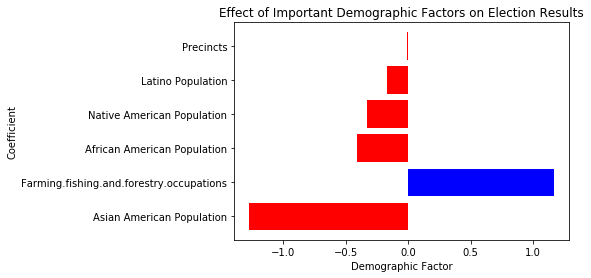

In [21]:
coef_df.rename({'':'demo_factor'}, axis = 'columns', inplace=True)
coef_df['abs_coef'] = np.abs(coef_df['coef']) 
coef_df.drop(0, axis = 'index', inplace = True)..sort_values(by = 'abs_coef', ascending = False, inplace = True)

bar_label = coef_df['demo_factor']
bar_length = coef_df['coef']
bar_color = np.where(bar_length > 0, 'blue', 'red')
plt.barh(bar_label, bar_length, color = bar_color)
plt.title('Effect of Important Demographic Factors on Election Results')
plt.xlabel('Demographic Factor')
plt.ylabel('Coefficient')

Asian american population has the largest nagative impact while farming, fishing, and forestry occupations is the only factor with positive effect.  

## Model Evaluation

This section describes methods used to evaluated the model. First, performance results from the OLS regression algorithm are analyzed and compared with the full feature model. Then, normality and homoscdacticity of the residuals are visualized and analyzed.

### $R^2$ Performance

The performance measured by $R^2$ is reduced to 0.329; however, all remaining features are statistically significant with very nigligible p-values.

### Normality and Homoscdacity of Residuals

The distribution of residuals of the model is obtained as follows:

(array([  6.,  10.,  23.,  45.,  94., 197., 284., 430., 501., 511., 450.,
        313., 153.,  75.,  33.,  11.,   2.,   1.,   0.,   2.]),
 array([-29.61827973, -26.28406835, -22.94985696, -19.61564557,
        -16.28143419, -12.9472228 ,  -9.61301142,  -6.27880003,
         -2.94458864,   0.38962274,   3.72383413,   7.05804552,
         10.3922569 ,  13.72646829,  17.06067967,  20.39489106,
         23.72910245,  27.06331383,  30.39752522,  33.73173661,
         37.06594799]),
 <a list of 20 Patch objects>)

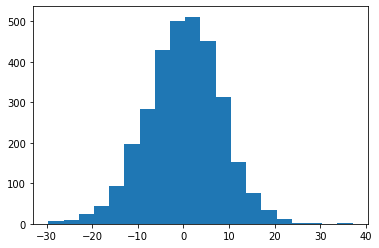

In [73]:
plt.hist(lm.resid, bins=20)

The distribution is quite normal confirming the validity of the model.

The following figure shows the residuals with respect to the fitted values.

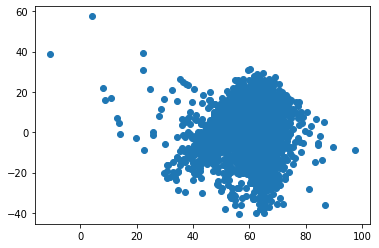

In [17]:
plt.scatter(lm.fittedvalues, lm.resid)

The variance of residuals is quite uniform accross fitted values and there is no significant pattern of residual variation across fitted values:

### Prediction Accuracy

The created model is used to predict 2016 election results. The accuracy of the prediction for 2016 is compared to that of 2012 based on which the model was built. The following figure visualizes the predition errors for different counties. The average error for 2016 stands higher than 2012.

In [22]:
plt.figure()
plt.plot(vote_df['Republicans12_VoteShare']-prediction, '.', label='2012')
plt.plot(vote_df['Republicans16_VoteShare']-prediction, '.', label='2016')
plt.legend()

NameError: name 'prediction' is not defined

<Figure size 432x288 with 0 Axes>

To obtain a quntitative measure of accuracy, a metric is used based on sum of error squares as $\sqrt\frac{\sum_{i=1}^N e_i^2}{N}$ where $e$ represents prediction error, $i$ denotes the index of the county, and $N$ designates the total number of counties (i.e., 3141). This metric is in the same unit as error which in turn has common units with the vote share (i.e., %). It is impremented as below and the results for 2012 and 2016 are visualized for comparison using a horzontal bar chart.

In [80]:
error12 = np.sqrt(np.mean(np.power(vote_df['Republicans12_VoteShare']-prediction,2)))
error16 = np.sqrt(np.mean(np.power(vote_df['Republicans16_VoteShare']-prediction,2)))
plt.barh(['2012', '2016'], [error12, error16])
plt.xlabel('Prediction Error (%)')
plt.ylabel('Election Year')

NameError: name 'prediction' is not defined

The prediction error is about 12% which is a reasonable performance. Furthermore, the prediction error is better for 2012 than 2016 because the model is built on 2012 data. This result is also compatible with prediction error scatter plot shown above.

### Comparison with Forward Variable Selection 

To get a sense of the performance improvement achieved through VIF technique, the developed model is compared with a linear model developed based on forward variable selection. In this technique, top correlated variables are added to the model until one of the coefficients become statistically insignificant

In [6]:
best_feature_lm = sm.OLS(vote_df['Republicans12_VoteShare'], sm.add_constant(demo_df['White (Not Latino) Population'])).fit()
best_feature_lm.summary()

C:\Users\arali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans12_VoteShare   R-squared:                       0.192
Model:                                 OLS   Adj. R-squared:                  0.192
Method:                      Least Squares   F-statistic:                     745.0
Date:                     Sat, 01 Feb 2020   Prob (F-statistic):          2.28e-147
Time:                             14:08:50   Log-Likelihood:                -12621.
No. Observations:                     3141   AIC:                         2.525e+04
Df Residuals:                         3139   BIC:                         2.526e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            34.4770      0.993     34.708      0.000      32.529      36.425
White (Not Latino) Population     0.3340      0.012     27.294      0.000       0.310       0.358
==============================================================================
Omnibus:                       21.606   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.162
Skew:                          -0.098   Prob(JB):                     0.000188
Kurtosis:                       2.696   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
corr_theshold = 0.3
highCorr_df = corr12_df.where(corr12_df['abs_corr12'] >= corr_theshold)
highCorr_df

,Demographic info,abs_corr12,corr12,p_value12
0,White (Not Latino) Population,0.437955,0.437955,2.284088e-147
1,Children.in.single.parent.households,0.427325,-0.427325,1.210057e-139
2,Sexually.transmitted.infections,0.414017,-0.414017,2.344544e-130
3,African American Population,0.392567,-0.392567,3.012613e-116
4,Graduate Degree,0.369278,-0.369278,4.517001e-102
5,Construction.extraction.maintenance.and.repair...,0.345326,0.345326,1.149040e-88
6,Unemployment,0.328212,-0.328212,8.815779e-80
7,Asian American Population,0.304657,-0.304657,1.867132e-68
8,At Least Bachelors's Degree,0.303216,-0.303216,8.532572e-68
9,Votes,0.302003,-0.302003,3.047631e-67


In [8]:
feature_list = corr12_df.loc[0:3,'Demographic info']
feature_list

0           White (Not Latino) Population
1    Children.in.single.parent.households
2         Sexually.transmitted.infections
3             African American Population
Name: Demographic info, dtype: object

In [9]:
best_feature_lm = sm.OLS(vote_df['Republicans12_VoteShare'], sm.add_constant(demo_df[feature_list])).fit()
best_feature_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans12_VoteShare   R-squared:                       0.243
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     251.5
Date:                     Sat, 01 Feb 2020   Prob (F-statistic):          1.26e-187
Time:                             14:08:50   Log-Likelihood:                -12518.
No. Observations:                     3141   AIC:                         2.505e+04
Df Residuals:                         3136   BIC:                         2.508e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   58.9546      1.970     29.927      0.000      55.092      62.817
White (Not Latino) Population            0.1669      0.017      9.731      0.000       0.133       0.200
Children.in.single.parent.households   -27.8796      3.312     -8.418      0.000     -34.374     -21.386
Sexually.transmitted.infections         -0.0056      0.001     -4.035      0.000      -0.008      -0.003
African American Population             -0.0639      0.025     -2.588      0.010      -0.112      -0.015
==============================================================================
Omnibus:                       63.476   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.547
Skew:                          -0.296   Prob(JB):                     1.17e-13
Kurtosis:                       2.676   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

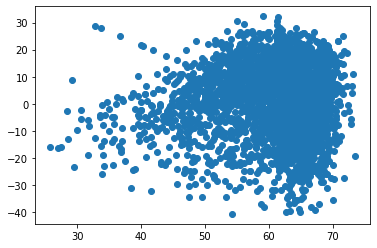

In [10]:
plt.scatter(best_feature_lm.fittedvalues, best_feature_lm.resid)

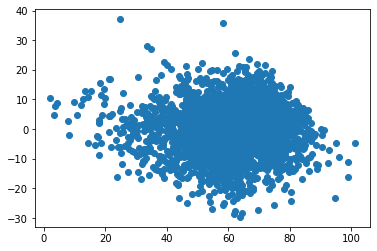

In [13]:
plt.scatter(lm.fittedvalues, lm.resid)

In [14]:
coef_table = lm.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns = coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df[coef_df['P>|t|'] >= 0.05]

,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,145.764800,416.213,0.350,0.726,-670.315,961.845
1,Precincts,-0.001500,0.002,-0.651,0.515,-0.006,0.003
3,Less Than High School Diploma,-0.026800,0.088,-0.303,0.762,-0.200,0.147
4,At Least High School Diploma,-0.121400,0.081,-1.496,0.135,-0.281,0.038
7,School Enrollment,0.025200,0.035,0.713,0.476,-0.044,0.094
8,Median Earnings 2010,-0.000062,5.67e-05,-1.103,0.270,-0.000,4.86e-05
9,White (Not Latino) Population,-0.653700,3.013,-0.217,0.828,-6.561,5.253
10,African American Population,-1.326600,3.012,-0.440,0.660,-7.233,4.580
11,Native American Population,-1.271700,3.013,-0.422,0.673,-7.179,4.636
12,Asian American Population,-1.245300,3.014,-0.413,0.680,-7.155,4.664
